<a href="https://colab.research.google.com/github/LintangAprillya/PCVK_Ganjil_2024/blob/main/Quiz%202%20PCVK%20-%20Klasifikasi%20Sampah%20dengan%20Metode%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KUIS 2 - PCVK**
----
## Judul: Klasifikasi Sampah dengan Metode CNN (Convolutional Neural Network)
----
### Nama  : Lintang Aprillya Sari
### Kelas : TI - 3C   
### NIM   : 2241720231
### No    : 13


# Preparation Data

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from tensorflow.keras.models import Sequential

import glob, os, random, zipfile


In [37]:
# Ekstraksi file ZIP
dataset_path = 'dataset'
zip_file = zipfile.ZipFile('garbage-classification.zip')
zip_file.extractall(dataset_path)
zip_file.close()

In [38]:
base_path = os.path.join(dataset_path, 'garbage classification/Garbage classification')

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(f"Jumlah total gambar pada dataset : {len(img_list)}" f" gambar")

Jumlah total gambar pada dataset : 2527 gambar


# Training

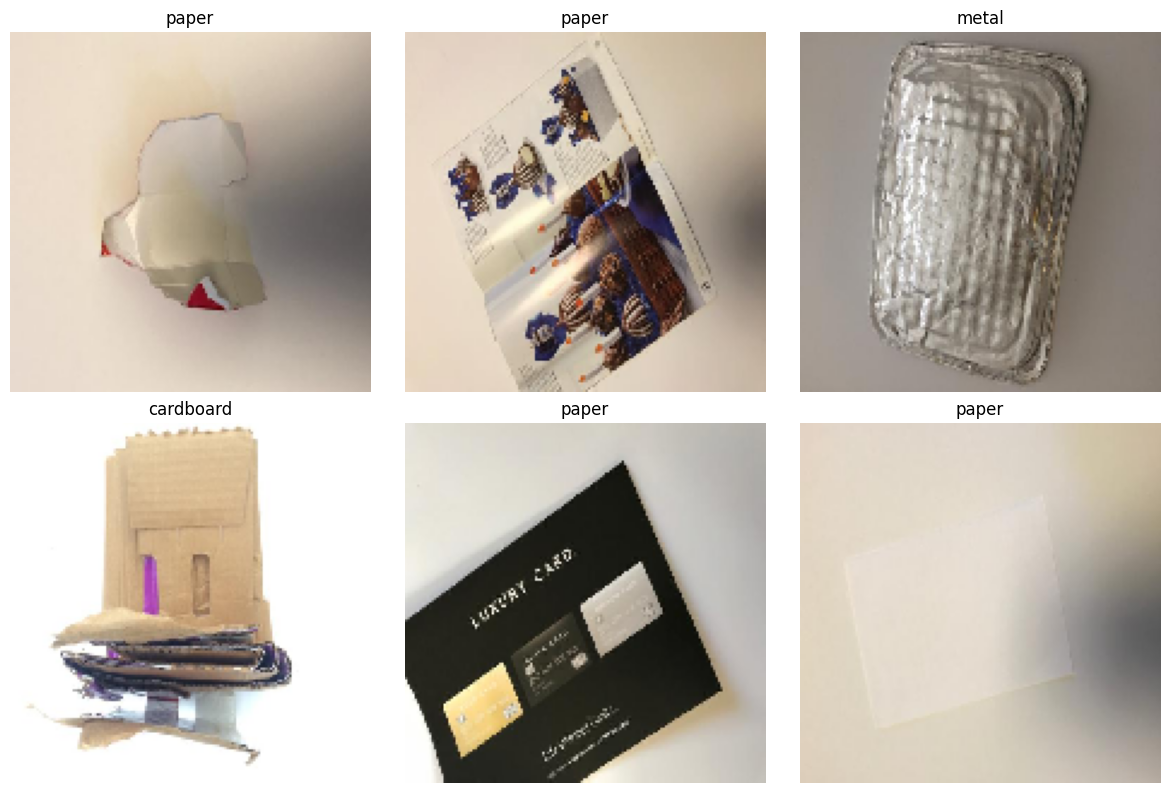

In [39]:
# Menampilkan 6 gambar acak dari dataset
plt.figure(figsize=(12, 8))

for i, img_path in enumerate(random.sample(img_list, 6)):
    # Mengambil nama kelas dari path
    label = os.path.basename(os.path.dirname(img_path))

    # Memuat dan mengubah gambar menjadi array
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img, dtype=np.uint8)

    # Menampilkan gambar
    plt.subplot(2, 3, i + 1)
    plt.imshow(img_array.astype('uint8'))
    plt.axis('off')
    plt.title(label)  # Menampilkan label sebagai judul gambar

plt.tight_layout()
plt.show()

In [40]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1  # Split 10% data untuk validasi
)

# Generator data untuk training
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

# Generator data untuk validasi
validation_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

# Menampilkan label kelas
labels = (train_generator.class_indices)
labels = dict((v, k) for k, v in labels.items())
print("Label kelas:", labels)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
Label kelas: {0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [41]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

# Kompilasi model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 300, 300, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 150, 150, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 75, 75, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 43808)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,803,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,842,022 (10.84 MB)

 Trainable params: 2,842,022 (10.84 MB)

 Non-trainable params: 0 (0.00 B)

# Train Model CNN untuk Training dan Validasi

In [42]:
model.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 55s 354ms/step - acc: 0.2381 - loss: 1.8823 - val_acc: 0.3147 - val_loss: 1.5656
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 81s 359ms/step - acc: 0.3876 - loss: 1.5052 - val_acc: 0.4024 - val_loss: 1.5209
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 83s 364ms/step - acc: 0.4261 - loss: 1.3887 - val_acc: 0.4502 - val_loss: 1.3323
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 79s 343ms/step - acc: 0.4561 - loss: 1.3489 - val_acc: 0.4861 - val_loss: 1.2878
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 345ms/step - acc: 0.5085 - loss: 1.2030 - val_acc: 0.4661 - val_loss: 1.2479
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 83s 364ms/step - acc: 0.5475 - loss: 1.1771 - val_acc: 0.4622 - val_loss: 1.2831
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 54s 363ms/step - acc: 0.5696 - loss: 1.1136 - val_acc: 0.4900 - val_loss: 1.1905
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 81s 356ms/step - acc: 0.5886 - loss: 1.0868 - val_acc: 0.5339 - val_loss: 1.2197
Epoch 9/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 52s

KeyboardInterrupt: 

In [44]:
#define tes generator

test_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',  # Atau gunakan data uji jika tersedia
    seed=0
)


Found 251 images belonging to 6 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


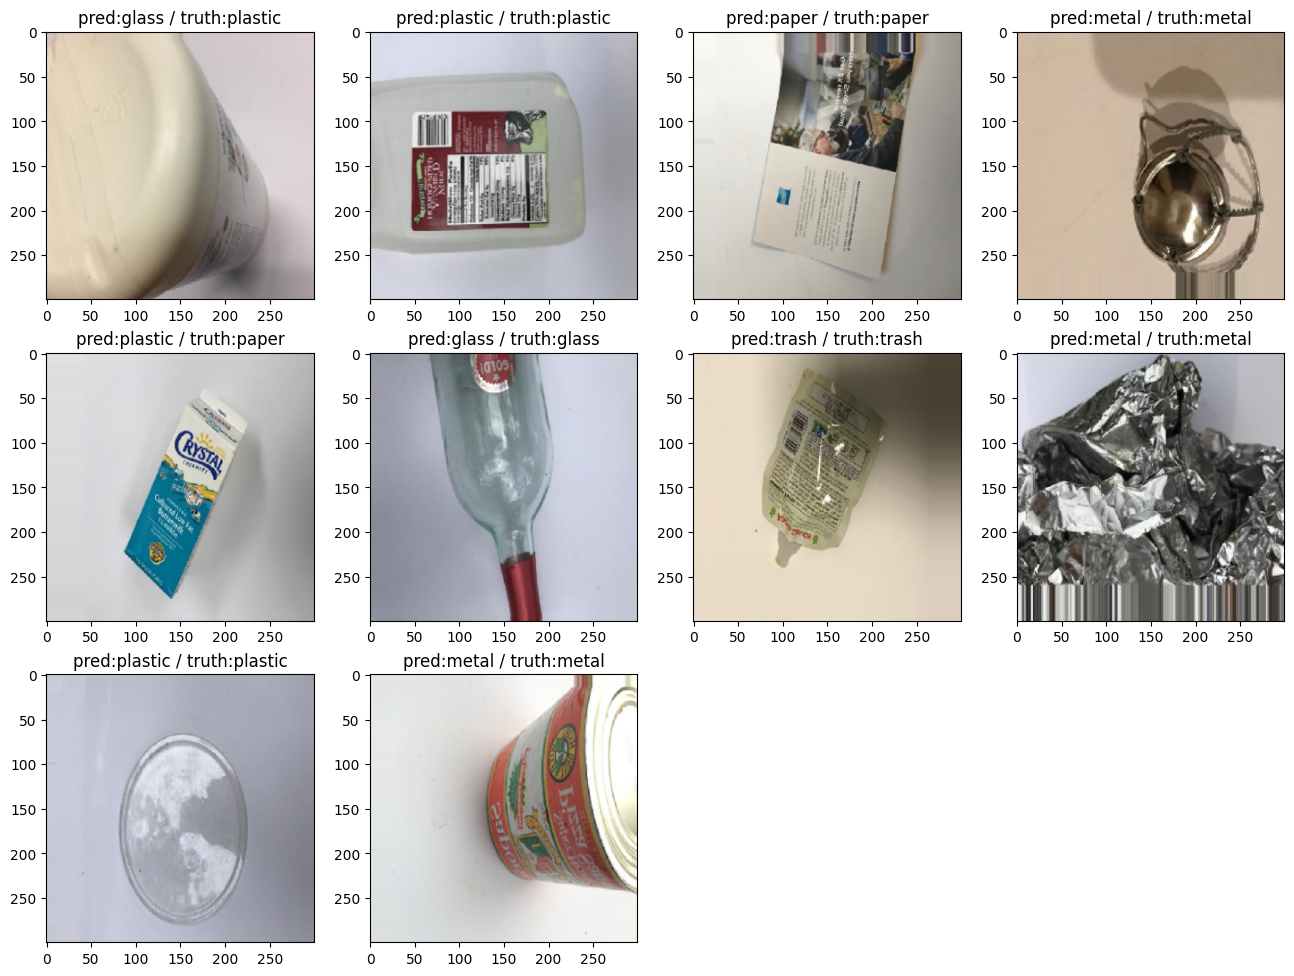

In [45]:
#ngambil batch data dari generator validasi / test
test_x, test_y = test_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(10):
  plt.subplot(4, 4, i+1)
  plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
  plt.imshow(test_x[i])

# Testing

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# evaluasi model (test data)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 386ms/step - acc: 0.7093 - loss: 0.9062
Test Loss: 1.0017, Test Accuracy: 0.6892


In [48]:
# save model (bisa dipakai lagi nanti -> biar tidak usah ngetrain lagi)

model.save('garbage_classification_model.h5')

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step


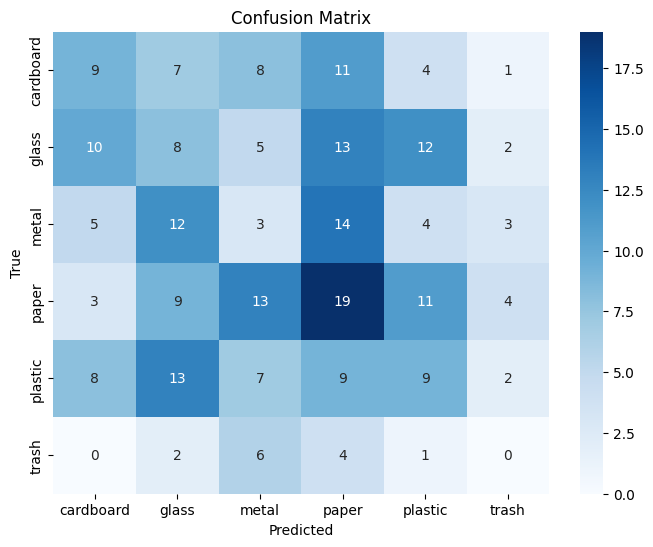

              precision    recall  f1-score   support

   cardboard       0.26      0.23      0.24        40
       glass       0.16      0.16      0.16        50
       metal       0.07      0.07      0.07        41
       paper       0.27      0.32      0.29        59
     plastic       0.22      0.19      0.20        48
       trash       0.00      0.00      0.00        13

    accuracy                           0.19       251
   macro avg       0.16      0.16      0.16       251
weighted avg       0.19      0.19      0.19       251



In [49]:
# Prediksi seluruh data uji
test_preds = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1, verbose=1)
test_preds = np.argmax(test_preds, axis=1)

# Mendapatkan label sebenarnya
test_labels = test_generator.labels

# Confusion matrix
cm = confusion_matrix(test_labels, test_preds)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels.values(), yticklabels=labels.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report untuk metrik tambahan
print(classification_report(test_labels, test_preds, target_names=labels.values()))

Test


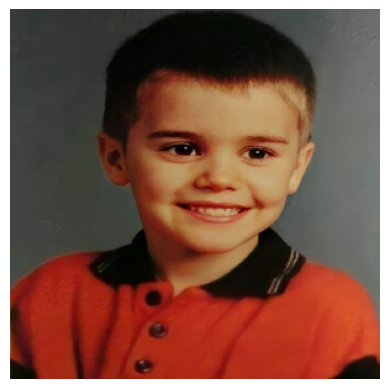

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Gambar ini bukan sampah


In [50]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

# Memuat model yang telah dilatih
model = tf.keras.models.load_model('garbage_classification_model.h5')

# Daftar label kelas berdasarkan training
labels = {
    0: 'cardboard',
    1: 'glass',
    2: 'metal',
    3: 'paper',
    4: 'plastic',
    5: 'trash'
}

# Path gambar di folder 'test'
img_path = os.path.join('test/justinb.jpg')  # Sesuaikan nama folder dan file
img = cv2.imread(img_path)

# Preprocessing gambar agar sesuai dengan input model
img = cv2.resize(img, (300, 300))  # Sesuaikan ukuran input model
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

# Menambahkan dimensi batch
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalisasi seperti saat training

# Melakukan prediksi
predictions = model.predict(img)
score = tf.nn.softmax(predictions[0])

# Tentukan threshold untuk deteksi sampah
threshold = 0.80  # Jika prediksi kurang dari 80%, klasifikasikan sebagai 'Bukan Sampah'

# Cek apakah prediksi di atas threshold
predicted_class = np.argmax(score)
if np.max(score) < threshold:
    print("Gambar ini bukan sampah")  # Deteksi sebagai bukan sampah
else:
    print(f"This image most likely belongs to '{labels[predicted_class]}' with a confidence of {100 * np.max(score):.2f}%")

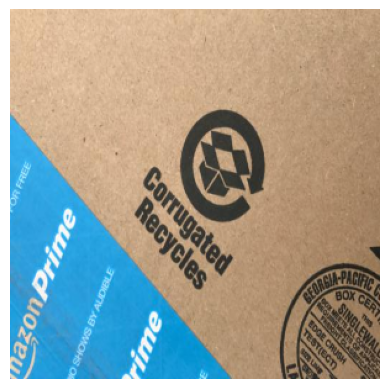

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
This image most likely belongs to 'cardboard' with a confidence of 34.57%


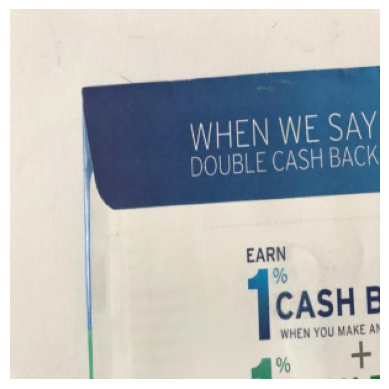

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This image most likely belongs to 'paper' with a confidence of 32.74%


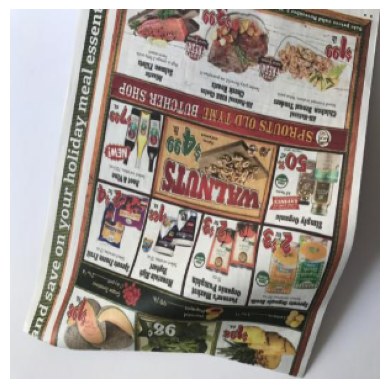

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
This image most likely belongs to 'paper' with a confidence of 35.17%


In [51]:
# Fungsi untuk memuat gambar dan melakukan prediksi
def predict_image(img_path):
    # Memuat gambar untuk prediksi
    img = cv2.imread(img_path)

    # Preprocessing gambar agar sesuai dengan input model
    img = cv2.resize(img, (300, 300))  # Sesuaikan ukuran input
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Menampilkan gambar
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Menambahkan dimensi batch
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalisasi seperti saat training

    # Melakukan prediksi
    predictions = model.predict(img)
    score = tf.nn.softmax(predictions[0])

    # Menampilkan hasil prediksi
    predicted_class = np.argmax(score)
    print(f"This image most likely belongs to '{labels[predicted_class]}' with a confidence of {100 * np.max(score):.2f}%")

# Gambar pertama: 'cardboard13.jpg'
img_path1 = 'test/cardboard13.jpg'  # Ganti dengan path gambar Anda
predict_image(img_path1)

# Gambar kedua: 'paper7.jpg'
img_path2 = 'test/paper7.jpg'  # Ganti dengan path gambar Anda
predict_image(img_path2)

# Gambar kedua: 'paper47.jpg'
img_path2 = 'test/paper47.jpg'  # Ganti dengan path gambar Anda
predict_image(img_path2)